<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/computer_vision_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision

La visión por computador (computer vision) se define como un área científica que estudia métodos para permitir a los ordenadores ganar conocimiento de alto nivel de imágenes y vídeos.

La visión por computador comprende desde técnicas para tratar las imágenes (preprocesado de datos) hasta métodos que permiten calcular características (features) y extraer conclusiones de la fuente de datos. 

En los últimos años las técnicas de Deep Learning han tomado especial relevancia en las tareas de computer visión debido a la alta complejidad del tratamiento y el procesamiento de imágenes. Sin embargo, a día de hoy, muchas tareas de visión por computador siguen resolviéndose con algoritmos clásicos y técnicas tradicionales de computer vision.



## Problemas clásicos de computer vision

Algunos de los problemas clásicos de computer vision son:

- Clasificación: Predecir una o más etiquetas que permitan clasificar la imagen.

- Regresión: Predecir uno o más valores numéricos de propiedades que se puedan inferir a través de la imagen.

- Detección de objetos (Object Detection): Encontrar un objeto de una clase específica en la imagen y calcular sus coordenadas.

- Seguimiento de objetos (Tracking): Seguir el movimiento de un objeto en una secuencia de imágenes ordenada.



# Convolución

Antes de comenzar a estudiar las diferentes técnicas de deep learning que se utilizan para resolver los problemas de computer vision estudiaremos una operación que tomará especial importancia en estos métodos, la convolución.

La convolución puede definirse como una operación que involucra a dos funciones y genera una nueva función que expresa como la forma de la primera función es modificada por la acción de la otra.

Su definición para variables continuas es la siguiente:

$f(τ)*g(τ) = \int_{-inf}^{inf} f(τ)g(t-τ)dτ$

Y para variables discretas:

$f[m]*g[m] = \sum_{n=-inf}^{inf} f[m]g[n-m]$

El resultado de realizar la convolución sobre dos funciones puede apreciarse en la siguiente imagen:

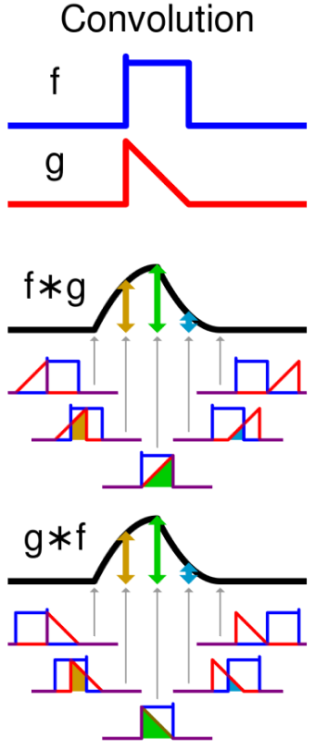

Sin embargo la operación realizada a menudo en visión por computador y en concreto en las técnicas de deep learning es similar pero no exactamente igual que esta, es conocida como cross-correlation.

## Cross-Correlation

La cross-correlation de dos funciones es una técnica que permite medir la similitud de una función con respecto a otra que se desliza. Su definición para variables continuas es:

$f(τ)\star g(τ) = \int_{-inf}^{inf} f(τ)g(t+τ)dτ$

Y para variables discretas:

$f[m]\star g[m] = \sum_{n=-inf}^{inf} f[m]g[n+m]$

El resultado de la cross-correlation puede encontrarse en la siguiente imagen:

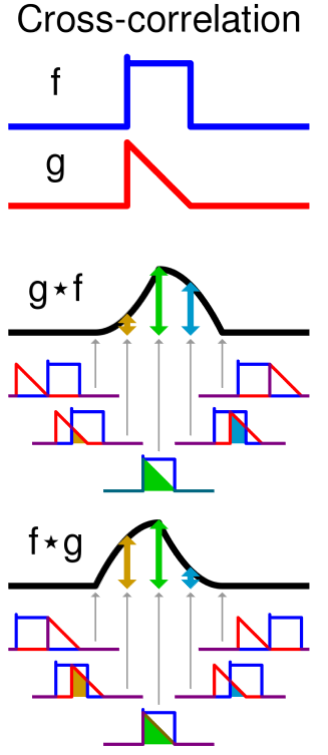

En deep learning cuando se habla de convolución en realidad se hace referencia a cross-correlation debido a que la segunda función por la que se multiplica no se gira (-τ y τ).

# Ejercicio

Realiza la cross-correlation de una señal seno y coseno utilizando scipy.signal.correlate. Utilizad np.sin y np.cos para calcular el seno y el coseno.

Visualizad el seno, el coseno y el resultado de la correlación.

In [4]:
import numpy as np
from scipy.signal import correlate 
import plotly.express as px

In [36]:
# Código aquí
x = np.linspace(0,10,num=300) #Input seno
x_2 = x+1.57 #Input coseno

# 2D Convolution (Cross-Correlation)

Hasta el momento hemos estudiado la definición general de convolución y hemos realizado un ejercicio sobre señales en 1D. Sin embargo las imágenes se representan mediante matrices en 2D.

Vamos a definir algunos conceptos que aparecerán frecuentemente.

Imagen: Input o entrada del proceso de computer vision.

Filtro (filter): Matriz en 2d que se desliza a través de la entrada durante la convolución.

Padding: Valores nulos que se añaden a la imagen con el objetivo de no reducir su tamaño durante la convolución.

Stride: Velocidad de deslizamiento del filtro sobre la imagen.

La convolución en 2d se define como el **dot product** del filtro sobre cada región de la imagen. Veámoslo con un ejemplo

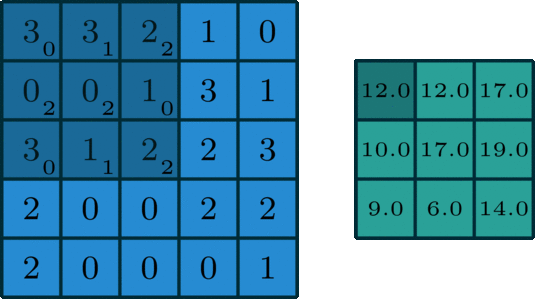

In [44]:
# Supongamos que tenemos estas dos matrices como input y filter
matrix_input = np.array([[3,3,2,1,0],
                        [0,0,1,3,1],
                        [3,1,2,2,3],
                        [2,0,0,2,2],
                        [2,0,0,0,1]])
filter = np.array([[0,1,2],
                   [2,2,0],
                   [0,1,2]])

In [49]:
# Calculamos el primer valor
matrix_slice = matrix_input[:3,:3]
result = np.multiply(matrix_slice, filter) #Element wise mult
result

array([[0, 3, 4],
       [0, 0, 0],
       [0, 1, 4]])

# Ejercicio

Calculad los valores de la diagonal de la matriz resultante en el ejemplo

Como se puede apreciar el resultado de la convolución de la entrada por el filtro es una matriz de menor tamaño que la original. Las dimensiones de la salida dependen de la dimensión de la entrada (input) y la velocidad a la que esta se recorre por el filtro.

La dimensión a la salida se puede controlar mediante los parámetros padding y stride. Veamoslos en detalle.

Como habéis podido comprobar al realizar la convolución de la entrada con el filtro se reduce el tamaño de la salida. Esto se da debido al tipo de operación que se realiza sobre la imagen. Sin embargo, a menudo es deseable que la entrada y la salida del proceso tengan el mismo tamaño. Una posible solución para este problema es añadir padding a la imagen. El término padding hace referencia al concepto de añadir "píxeles" falsos a la entrada tal y como se muestra en la siguiente imagen.

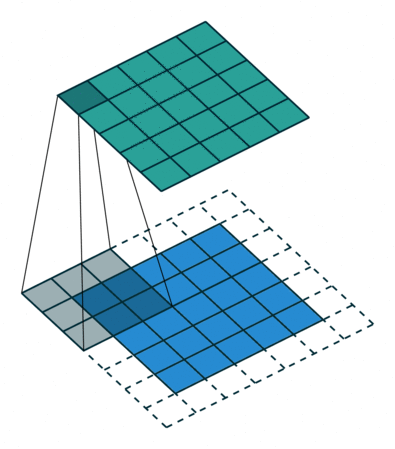

Al añadir estos píxeles falsos a la entrada se aumenta artificialmente el tamaño de la imagen consiguiendo de esta forma que el resultado final vea su tamaño inalterado.

En cuanto al término stride hace referencia a la velocidad con la que la ventana recorre a la imagen. Al aumentar este valor es posible recorrer la imagen a mayor velocidad, haciendo, en este caso, al resultado más pequeño.

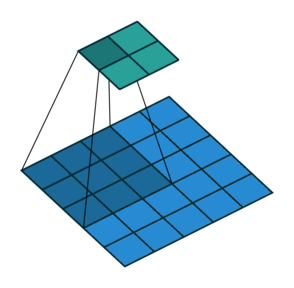

# Ejercicio

Realizad la convolución de la entrada y el filtro propuestos utilizando el parámetro mode="valid" y mode="same" en la función.

¿Con cuál de los dos parámetros se ha añadido el padding?

# Edge detector filters

La convolución ha sido aplicada ampliamente en detección de imágenes incluso antes de la incorporación del deep learning al campo. Uno de los filtros más comunes aplicados son los filtros de detección de bordes verticales y horizontales.

Estos filtros realizan una convolución para calcular la aparición de bordes en las imágenes. Este cálculo es posible debido a que entre dos objetos diferentes existirá un "borde" o más que los distingue debido a un cambio en la intensidad de los píxeles.

El filtro detector de bordes más sencillo que podemos encontrar es el llamado Sobel Operator que toma la siguiente forma para bordes verticales:

\begin{matrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1
\end{matrix}

Y esta otra para bordes horizontales:

\begin{matrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{matrix}

Comprobemos su funcionamiento con un ejemplo.




In [51]:
import matplotlib.pyplot as plt

In [52]:
# Generate black&white image
ones = np.full(shape=(200,200), fill_value=255)
zeros = np.zeros(shape=(200,200))

image = np.concatenate((ones, zeros), axis=1)

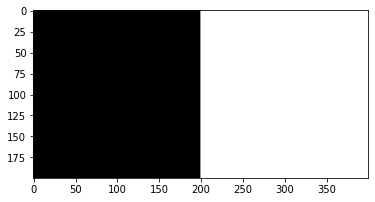

In [55]:
plt.imshow(image, cmap="Greys")

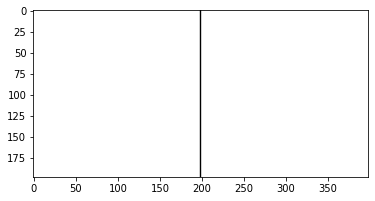

In [70]:
# Apply Convolution
sobel_vertical = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])
result = correlate(image, sobel_vertical, mode="valid")
plt.imshow(result, cmap="Greys")

# Ejercicio

Generad una imagen en blanco y negro con un borde horizontal y calculad ese borde con el sobel operator.

# Cargar y tratar una imagen a color

Hasta el momento hemos aprendido a trabajar con algunas operaciones que tienen una alta importancia en computer vision como son la convolución y los edge detector filters.

Sin embargo, es importante aprender a cargar una imagen y operar con ella en Python si deseamos programar sistemas de computer vision.

Para este propósito usaremos la librería PIL.

In [72]:
!curl https://cdn.pocket-lint.com/r/s/970x/assets/images/148766-smart-home-review-echo-wall-clock-image1-yhik6caxgz-jpg.webp > image.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128k  100  128k    0     0  90934      0  0:00:01  0:00:01 --:--:-- 90934


In [89]:
from PIL import Image
from PIL import ImageOps

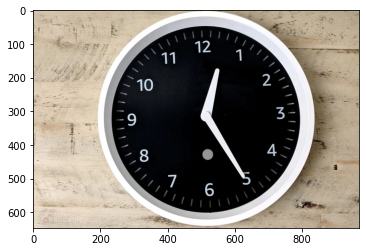

In [80]:
img = Image.open("./image.jpg")
plt.imshow(img)

Generalmente al cargar una imagen se os cargará en el espacio de color rgb. El espacio de color rgb es un espacio aditivo en el que cada píxel se define por la suma de la intensidad de un valor rojo+verde+azul.

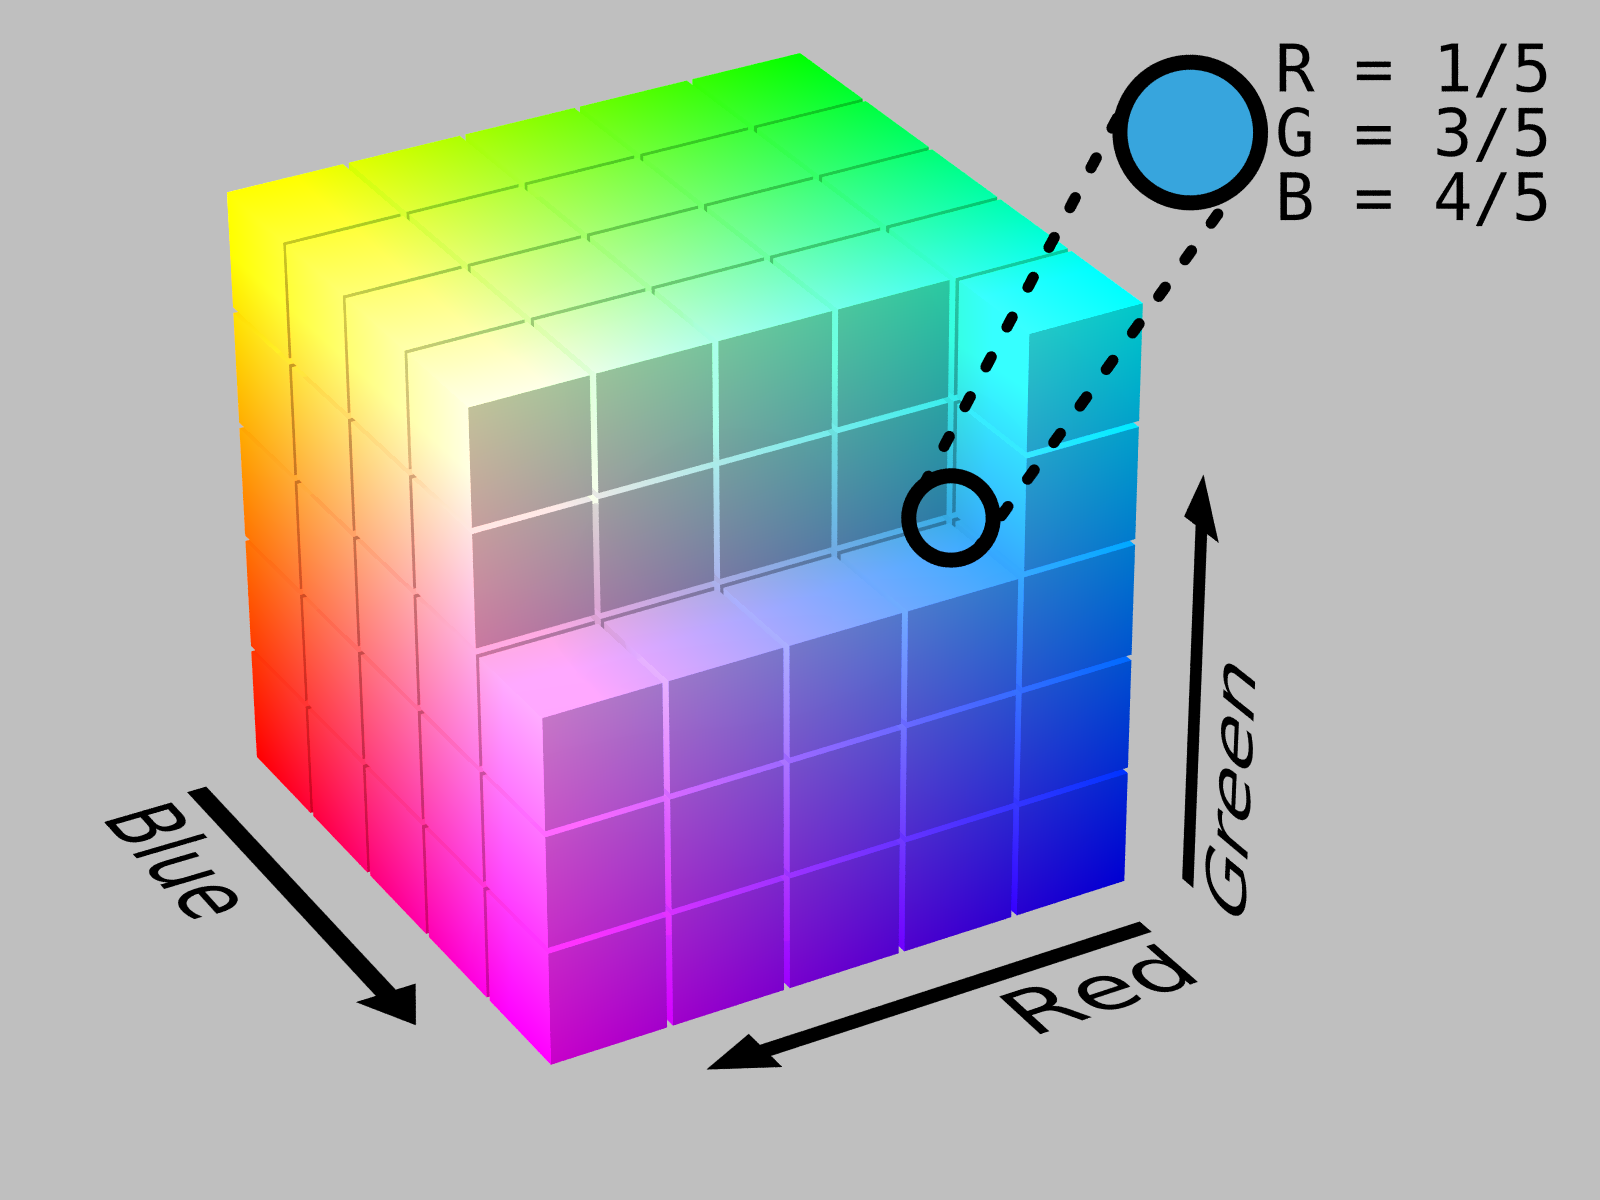

De esta manera al cargar una imagen obtendréis un tensor con las siguientes dimensiones:

$(wresolution, hresolution, 3)$

In [79]:
# Transformamos la imagen en numpy array
array = np.array(img)
array.shape

(647, 970, 3)

In [81]:
# Cargar espacio rojo
red = array[:,:,0]
# Cargar espacio verde
green = array[:,:,1]
# Cargar espacio azul
blue = array[:,:,2]

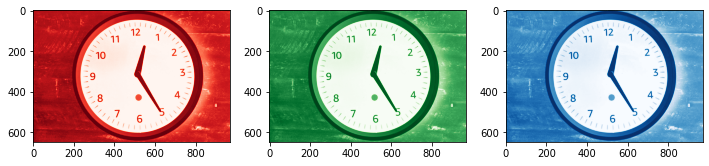

In [88]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(12,12))
axes[0].imshow(red, cmap="Reds")
axes[1].imshow(green, cmap="Greens")
axes[2].imshow(blue, cmap="Blues")

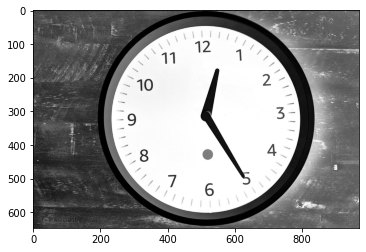

In [92]:
# Además es posible convertir la imagen original a una escala de grises
gray_img = ImageOps.grayscale(img)
plt.imshow(gray_img, cmap="Greys")

In [95]:
gray_array = np.array(gray_img)
gray_array.shape

(647, 970)

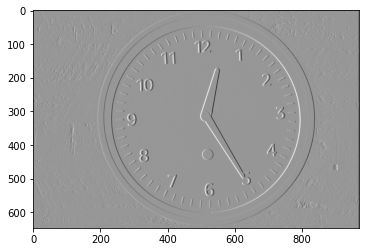

In [100]:
# Sobre la imagen en gris o una de las componentes rojo,verde,azul se puede
# aplicar edge detection
result = correlate(gray_array, sobel_vertical, mode="same")
plt.imshow(result, cmap="Greys")

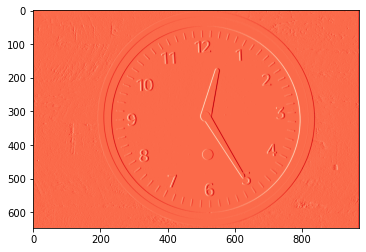

In [101]:
result = correlate(red, sobel_vertical, mode="same")
plt.imshow(result, cmap="Reds")

# Ejercicio

Cargad la imagen propuesta en el fragmento de código posterior, extraed sus valores rgb, transformadla a escala de grises y aplicad el sobel operator horizontal a sus componentes rgb y gris.

In [102]:
!curl https://get.pxhere.com/photo/laptop-notebook-writing-work-working-table-coffee-wood-keyboard-white-floor-view-mouse-notepad-meeting-internet-workspace-space-desktop-office-communication-professional-business-object-paper-note-place-background-creativity-wooden-digital-freelance-pc-document-information-maquette-news-top-delivery-workplace-copy-technique-copy-space-flooring-an-empty-a-cup-of-computational-the-amount-of-the-the-paperwork-fresh-coffee-relax-1188666.jpg > image_02.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6945k  100 6945k    0     0  3776k      0  0:00:01  0:00:01 --:--:-- 3774k


# Wrapping Up (Recapitulando)

Hasta el momento hemos aprendido a operar con imágenes y la base de la convolución. A través de esta misma hemos aprendido a calcular bordes utilizando el sobel operator. Sin embargo desde el punto de vista de ML cabría preguntarse qué es en realidad un borde para un modelo.

Si nos paramos a pensar lo que hemos hecho es un mero ejercicio de extracción de características, un borde podría ser usado por un sistema de computer vision para identificar objetos y delimitarlos. Pero, puede que los bordes no sean suficientes, es posible que el sistema necesite calcular features más complejas y apropiadas para identificar estructuras dentro de la imagen. 

Es interesante pensar en que tipo de filtros se pueden aplicar para diferenciar los ojos del resto del rostro de una persona o cuáles deberían utilizarses para identificar las ruedas de un coche. Aunque la herramienta más útil sería aquella que calculara los filtros de manera automática tomando de base, por ejemplo, una estructura de pesos como la siguiente.

\begin{matrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33}
\end{matrix}

Una vez definidos, los pesos podrían calcularse mediante aprendizaje por gradiente y utilizarlos para realizar operaciones de convolución que permitieran calcular las características más óptimas para resolver la tarea de aprendizaje del sistema.

Este mecanismo, basado en las operaciones que hemos aprendido hoy, es el mecanismo detrás de las CNN (Redes de Neuronas Convolucionales), la base de las arquitecturas que se utilizan en Deep Learning para generar modelos aplicados a la visión por computador.



